In [65]:
# Imports
import pandas as pd
from selenium import webdriver
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
import time

globalTab = []

page_url = "https://en.wikipedia.org/wiki/Epidemiology_of_HIV/AIDS" 
service = ChromeService(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.get(page_url)
time.sleep(5)

all = driver.find_element(By.XPATH, '//table[@class="wikitable"]')

rows = []
count = 0
for element in all.find_elements(By.XPATH, './/td'):
    
    element_text = element.text.strip()
    rows.append(element_text)
    if count % 4 == 3:
        globalTab.append(rows)
        rows = []
    count+=1
# print(globalTab)
for i in range(len(globalTab)):
    for j in range(len(globalTab[i])):
        if globalTab[i][j].isdigit():
            globalTab[i][j] = int(globalTab[i][j].replace(' ', ''))
        elif globalTab[i][j].replace(' ', '').isdigit():
            globalTab[i][j] = int(globalTab[i][j].replace(' ', ''))
df = pd.DataFrame(globalTab, columns=["year", "deaths_due_globally", "infection_incidence_rate", "infection_prevalence_rate"])
df['year'] = df['year'].replace('2021[39]', '2021')
df.to_excel("test.xlsx", index = False)
df.to_csv("deaths.csv", index = False)
driver.close()


# mydf = scrapping()

<Axes: xlabel='year', ylabel='deaths_due_globally'>

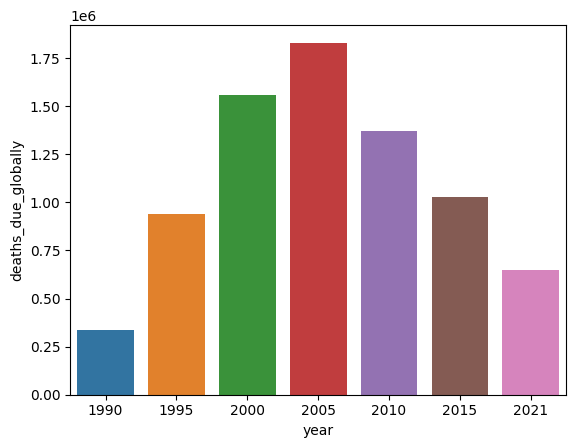

In [66]:
import numpy as np
import seaborn as sns
deaths_df = pd.read_csv("./deaths.csv")

sns.barplot(data=deaths_df, x="year", y="deaths_due_globally")

